        Date  Unnamed: 1  Berri1  CSC  Mais1  Mais2  Parc  PierDup  Rachel1  \
0 2013-01-01         NaN       0    0      1      0     6        0        1   
1 2013-01-02         NaN      69    0     13      0    18        0        2   
2 2013-01-03         NaN      69    2     21      6    22        1        0   
3 2013-01-04         NaN      80    0     22      4    16        0      125   
4 2013-01-05         NaN      52    4     19      3    12        0       97   

   Totem_Laurier  
0              0  
1              0  
2              0  
3              0  
4              0  
                      Date  Unnamed: 1       Berri1          CSC        Mais1  \
count                  261         0.0   261.000000   261.000000   261.000000   
mean   2013-05-11 00:00:00         NaN  2743.390805  1221.858238  1757.590038   
min    2013-01-01 00:00:00         NaN     0.000000     0.000000     1.000000   
25%    2013-03-07 00:00:00         NaN   392.000000    12.000000   236.000000   
50%   

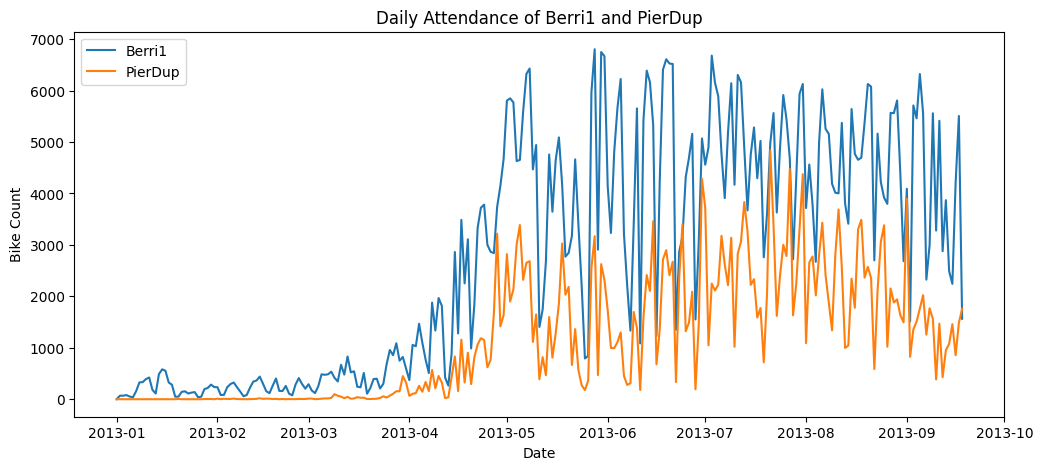

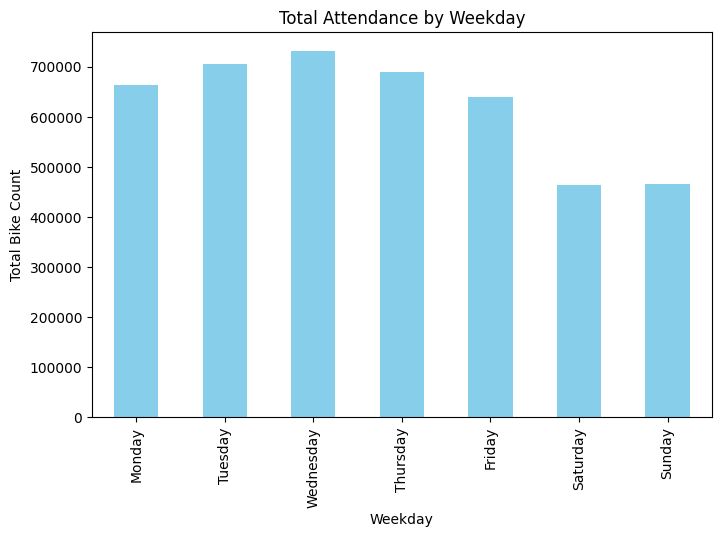

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"code/data/bikes.csv", parse_dates=["Date"], dayfirst=True)




# Convert all columns (except 'Date') to numeric, forcing errors to NaN
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Plot daily attendance of 'Berri1' and 'PierDup'
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Berri1"], label="Berri1")
plt.plot(df["Date"], df["PierDup"], label="PierDup")
plt.xlabel("Date")
plt.ylabel("Bike Count")
plt.legend()
plt.title("Daily Attendance of Berri1 and PierDup")
plt.show()

# Check index and weekday
df.set_index("Date", inplace=True)
df["Weekday"] = df.index.day_name()

# Get sum of all attendance as a function of the weekday
weekday_sum = df.groupby("Weekday").sum(numeric_only=True).sum(axis=1)

# Plot weekday attendance
plt.figure(figsize=(8, 5))
weekday_sum.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind="bar", color="skyblue")
plt.xlabel("Weekday")
plt.ylabel("Total Bike Count")
plt.title("Total Attendance by Weekday")
plt.show()


## Titanic 


   survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  
Survival Rate by Gender:
 sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

Survival 

C:\Users\satyamanishankar\AppData\Local\Temp\ipykernel_23176\2001559093.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_survival.index, y=gender_survival.values, palette="coolwarm")


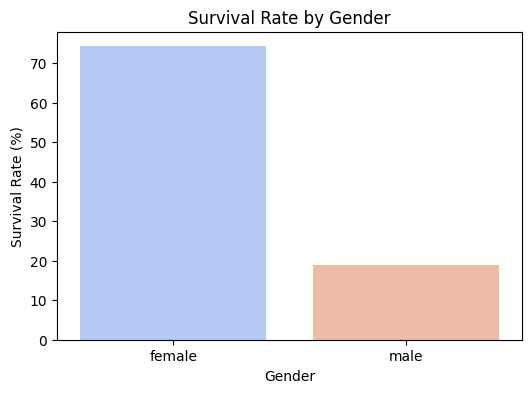

C:\Users\satyamanishankar\AppData\Local\Temp\ipykernel_23176\2001559093.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pclass_survival.index, y=pclass_survival.values, palette="viridis")


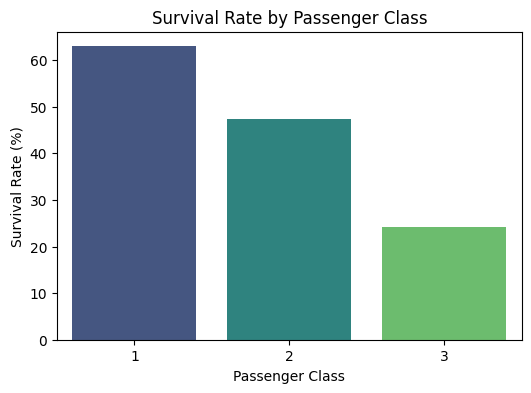

<Figure size 800x500 with 0 Axes>

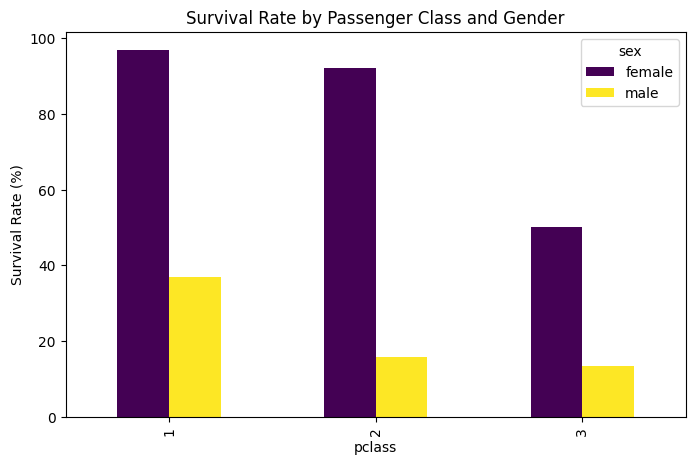

sex
female    233
male      109
Name: survived, dtype: int64
pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


C:\Users\satyamanishankar\AppData\Local\Temp\ipykernel_23176\2001559093.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_survival.index, y=class_survival.values, palette="viridis")


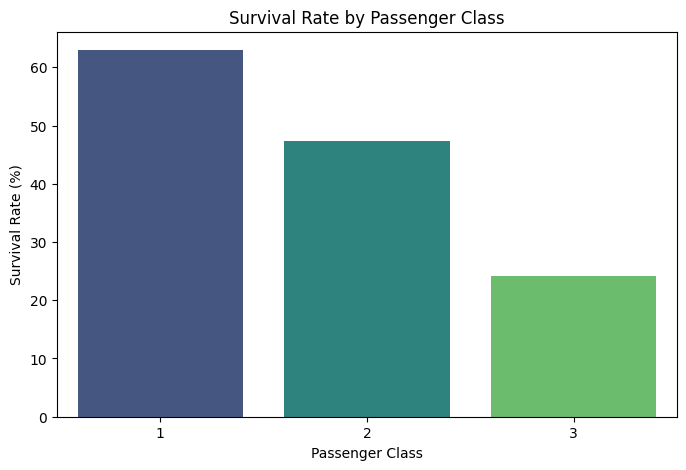

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"code/data/titanic_train.csv")



# 1. Check the first few rows
print(df.head())

# 2. Which gender survived more?
gender_survival = df.groupby("sex")["survived"].mean() * 100
print("Survival Rate by Gender:\n", gender_survival)

# 3. Does survival depend on passenger class (Pclass)?
pclass_survival = df.groupby("pclass")["survived"].mean() * 100
print("\nSurvival Rate by Passenger Class:\n", pclass_survival)

# 4. % of survival for each gender and Pclass
survival_pivot = df.pivot_table(values="survived", index="pclass", columns="sex", aggfunc="mean") * 100
print("\nSurvival Rate by Pclass and Gender:\n", survival_pivot)

# Visualization: Survival by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_survival.index, y=gender_survival.values, palette="coolwarm")
plt.xlabel("Gender")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Gender")
plt.show()

# Visualization: Survival by Pclass
plt.figure(figsize=(6, 4))
sns.barplot(x=pclass_survival.index, y=pclass_survival.values, palette="viridis")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Passenger Class")
plt.show()

# Visualization: Survival by Pclass & Gender
plt.figure(figsize=(8, 5))
survival_pivot.plot(kind="bar", figsize=(8, 5), colormap="viridis")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Passenger Class and Gender")
plt.show()


# Which gender survived more 
surivival=df.groupby("sex")["survived"].sum()
print(surivival)



#  Does it depend on pclass
class_survival = df.groupby("pclass")["survived"].mean()*100
print(class_survival)


plt.figure(figsize=(8, 5))
sns.barplot(x=class_survival.index, y=class_survival.values, palette="viridis")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Passenger Class")
plt.show()












## # C. Roger Federer database 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "code/data/federer.csv"
df = pd.read_csv(file_path, parse_dates=["start date"])

# 1. Calculate percentage of matches won by Federer
total_matches = len(df)
matches_won = (df["winner"] == "Roger Federer").sum()
win_percentage = (matches_won / total_matches) * 100
print(f"Federer Win Percentage: {win_percentage:.2f}%")

# 2. Calculate the proportion of double faults to total points
df["double_fault_proportion"] = df["player1 double faults"] / df["player1 total points total"]

# 3. Summary statistics for double fault proportion
print("\nDouble Faults Proportion Stats:")
print(df["double_fault_proportion"].describe())

# 4. Average Win Percentage per Surface
surface_win_rate = df[df["winner"] == "Roger Federer"].groupby("surface").size() / df.groupby("surface").size() * 100
print("\nFederer Win Rate by Surface:")
print(surface_win_rate)

# 5. Trend of Double Faults Over Years
df["year"] = df["start date"].dt.year
yearly_double_faults = df.groupby("year")["double_fault_proportion"].mean()

# Plot: Trend of Double Faults Over Years
plt.figure(figsize=(10, 5))
plt.plot(yearly_double_faults.index, yearly_double_faults.values, marker='o', linestyle='-', color='red')
plt.xlabel("Year")
plt.ylabel("Average Double Fault Proportion")
plt.title("Federer's Double Faults Trend Over the Years")
plt.grid(True)
plt.show()


Federer Win Percentage: 82.44%

Double Faults Proportion Stats:
count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: double_fault_proportion, dtype: float64

Federer Win Rate by Surface:
surface
Indoor: Carpet    73.684211
Indoor: Clay      83.333333
Indoor: Hard      83.628319
Outdoor: Clay     77.911647
Outdoor: Grass    87.142857
Outdoor: Hard     84.232365
dtype: float64


AttributeError: Can only use .dt accessor with datetimelike values

##Create two frequencies 5Hz and 50Hz sin signals 

## Create two frequencies 5Hz and 50Hz sin signals

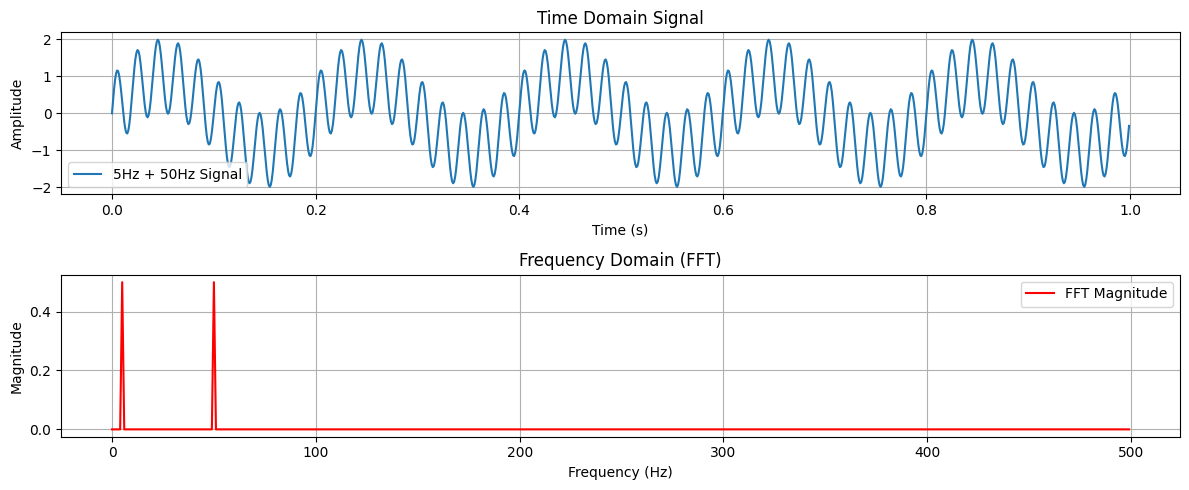

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second duration

# Generate sine waves at 5Hz and 50Hz
f1, f2 = 5, 50
signal1 = np.sin(2 * np.pi * f1 * t)
signal2 = np.sin(2 * np.pi * f2 * t)

# Combine both signals
combined_signal = signal1 + signal2

# Compute FFT
fft_values = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(fft_values), 1/fs)

# Plot time-domain signals
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(t, combined_signal, label="5Hz + 50Hz Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal")
plt.legend()
plt.grid()

# Plot FFT
plt.subplot(2, 1, 2)
plt.plot(frequencies[:fs//2], np.abs(fft_values[:fs//2]) / len(fft_values), label="FFT Magnitude", color='r')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain (FFT)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


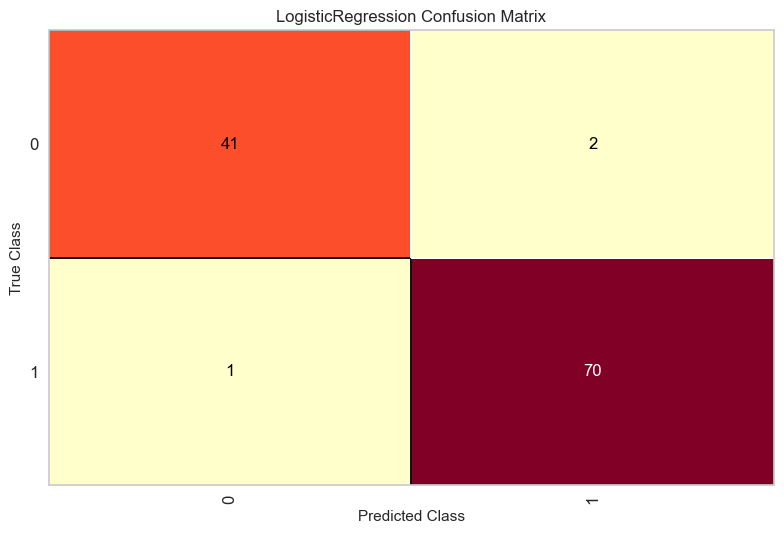

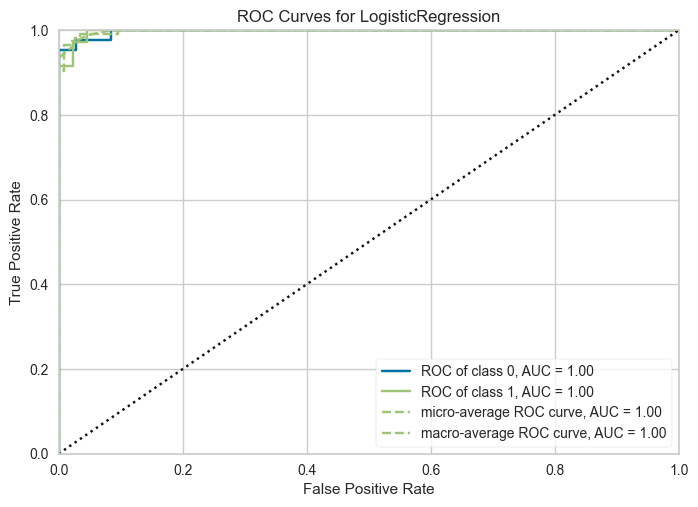

Best Parameters: {'lr__C': 10}


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target 

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr', LogisticRegression(solver='liblinear', random_state=42))
])

# Hyperparameter tuning
param_grid = {'lr__C': [0.1, 1, 10]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Visualization - Confusion Matrix
cm_viz = ConfusionMatrix(grid_search.best_estimator_)
cm_viz.fit(X_train, y_train)
cm_viz.score(X_test, y_test)
cm_viz.show()

# Visualization - ROC AUC
roc_viz = ROCAUC(grid_search.best_estimator_)
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)
roc_viz.show()

# Output best parameters
print("Best Parameters:", grid_search.best_params_)
